In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data taken from sklearn datasets

x =  np.array([-1.3474603 ,  0.3523434 ,  0.9546986 ,  0.03592805,  0.04800625,
        0.04860301,  0.72334161,  0.80208661, -1.14379857,  0.17941071,
       -0.64770677, -1.11281215, -1.58457724, -0.08798693,  2.47658416,
       -0.7322647 ,  1.54697933, -0.13070464,  0.30044554, -0.9443686 ,
       -0.30296397, -0.37444492, -1.15681626,  0.59857517, -2.37977527,
       -0.60768369,  0.54245131,  2.02240507,  0.04613557,  0.52324766,
        0.29714121, -1.54292905,  1.69235772,  0.20931349, -0.41830152,
        0.87084178, -1.14747663, -0.17521053, -0.9617768 ,  0.1886462 ,
        1.20200259,  1.99008302, -1.36096559, -0.05455871,  1.16418756,
       -1.45553433,  0.01908996, -0.77873992,  0.03754749, -0.34610187,
       -0.65122583,  0.15846954, -1.20894816, -0.64764453,  0.91484096,
       -1.84087587,  0.49995133,  1.27181862,  0.69359851,  0.55618522,
        0.4250724 , -1.09712188, -0.5648753 ,  0.35099715,  0.83783635,
        0.05443274, -0.0093601 , -2.35807363, -0.98299165,  0.93465006,
        0.79523395,  0.50991978, -0.17146461,  0.15989294,  2.22336022,
        0.33225315,  0.05056171, -0.52819607,  0.43027133,  1.63574754,
        0.78660228, -0.60688728,  0.39429521,  0.7965119 , -1.07529009,
       -0.19674528,  0.8365287 , -0.49581852,  1.3799201 ,  0.067471  ,
       -0.99590893, -0.90543814, -0.27620335,  0.24266016,  0.50977885,
        0.33225003, -1.10558404,  2.08787087,  0.28086468,  0.61866969])

y = np.array([-126.24922409,   50.92876904,   63.15463302,    6.05472009,
         -5.72954025,   -2.75191769,   58.70355923,   53.81362958,
        -95.34105851,   24.64812471,  -59.41697406,  -73.42349619,
       -104.16266749,   31.80766772,  171.15350154,  -67.75196497,
        141.46769811,  -24.36756973,   -2.11240097,  -32.59583109,
        -29.41505819,  -37.87145989, -101.89829601,   46.41287784,
       -181.34840044,  -31.77399504,   24.13154879,  163.94385144,
         10.77367111,   37.35891532,    0.98036703, -120.88573188,
        138.19938797,    9.20267903,  -16.2068899 ,   33.21708479,
        -45.61698488,   -1.77758908, -105.56283971,    5.26394625,
         89.5978923 ,  146.10300439,  -77.78704394,   -3.80893607,
         60.81195812,  -97.2027103 ,   -1.15989334,  -43.88245964,
         15.74278405,  -24.27446551,  -90.60148118,  -19.07314539,
       -101.79001521,  -56.55140067,   52.1696979 , -158.28468928,
         64.53968736,   84.52102913,   66.43434451,   36.86598297,
         37.43779494,  -82.91713341,  -21.4183161 ,   -5.54348338,
         59.88451573,    8.3784894 ,  -17.17634894, -160.50895428,
       -100.73717846,   80.30335894,   69.64956653,   28.14443518,
          9.7630474 ,   41.12497399,  176.92831393,    9.55981705,
         -4.40463276,  -24.03585202,   19.1701073 ,  102.48327018,
        101.52088195,  -58.51318402,   17.68768961,   63.05366753,
       -102.36728191,   -1.65856494,   64.66264562,  -44.1299115 ,
        117.99658351,   -4.63168152,  -76.71464299,  -67.2815873 ,
        -12.46435171,   24.2973507 ,   31.43120085,   34.44108322,
        -74.76820338,  160.99602125,   40.69772522,   33.43401768])

In [4]:
class SimpleLinearRegression:
    """
    Simple Linear Regression model.

    Parameters:
    :param learning_rate: The learning rate for gradient descent.
    :type learning_rate: float, optional (default=0.01)

    :param num_iterations: The number of iterations for gradient descent.
    :type num_iterations: int, optional (default=1000)

    :raises ValueError: If learning_rate is not a positive float or if num_iterations is not a positive integer.
    """

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        if not isinstance(learning_rate, (float, int)) or learning_rate <= 0:
            raise ValueError("Learning rate must be a positive float.")
        if not isinstance(num_iterations, int) or num_iterations <= 0:
            raise ValueError("Number of iterations must be a positive integer.")

        self.learning_rate = float(learning_rate)
        self.num_iterations = num_iterations
        self.weight = None
        self.bias = None
        self.x_test = None
        self.y_predict = None
        self.x_train = None
        self.y_train = None
        self.is_fitted = False

    def fit(self, x_train, y_train):
        """
        Fit the linear regression model to the training data.

        :param x_train: The input features for training.
        :type x_train: numpy.ndarray

        :param y_train: The target values for training.
        :type y_train: numpy.ndarray

        :raises ValueError: If the dimensions of x_train and y_train are not appropriate or if x_train and y_train have different lengths.
        """
        if len(x_train.shape) != 1:
            raise ValueError("Input feature 'x_train' must be a 1-dimensional array.")
        if len(y_train.shape) != 1:
            raise ValueError("Target 'y_train' must be a 1-dimensional array.")
        if len(x_train) != len(y_train):
            raise ValueError("Length of 'x_train' must be equal to the length of 'y_train'.")

        self.x_train = x_train
        self.y_train = y_train
        self.weight = np.random.rand(1)
        self.bias = np.random.random(1)

        for _ in range(self.num_iterations):
            self.weight, self.bias = self._gradient_descent(x_train, y_train, self.weight, self.bias)
        self.is_fitted = True
        
    def predict(self, x_test):
        """
        Generate predictions for new input data.

        :param x_test: The input features for prediction.
        :type x_test: numpy.ndarray

        :raises ValueError: If the dimensions of x_test are not appropriate or if fit has not been called.
        """
        if not self.is_fitted:
            raise ValueError("Fit the model using 'fit' before making predictions.")
        if len(x_test.shape) != 1:
            raise ValueError("Input feature 'x_test' must be a 1-dimensional array.")

        self.x_test = x_test
        self.y_predict = (self.x_test * self.weight) + self.bias


    def _gradient_descent(self, x, y, w, b):
        """
        Perform gradient descent to update model parameters.

        :param x: The input features.
        :type x: numpy.ndarray

        :param y: The target values.
        :type y: numpy.ndarray

        :param w: The current weight.
        :type w: float

        :param b: The current bias.
        :type b: float

        :return: Updated weight and bias.
        :rtype: tuple
        """
        n = len(x)
        y_pred = np.dot(x.reshape(-1, 1), w) + b

        dw = (2/n) * np.dot(x, (y_pred - y))
        db = (2/n) * np.sum(y_pred - y)

        w = w - (dw * self.learning_rate)
        b = b - (db * self.learning_rate)
        return w, b

    def plot(self):
        """
        Plot the training data and the linear regression line.
        """
        if self.x_train is None or self.y_train is None:
            raise ValueError("Training data 'x_train' and 'y_train' must be provided before calling plot.")
        if self.x_test is None or self.y_predict is None:
            raise ValueError("Predictions must be generated using 'predict' before calling plot.")

        fig, ax = plt.subplots(figsize=(7, 5))
        ax.scatter(self.x_train, self.y_train, color="teal", label='Training Data')
        ax.plot(self.x_test, self.y_predict, color="black", label='Linear Regression')

    
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend(loc="upper left", edgecolor="black", fancybox=False)

        fig.tight_layout()
        plt.show()


Bais: [6.66067237], Weight: [72.91232667]


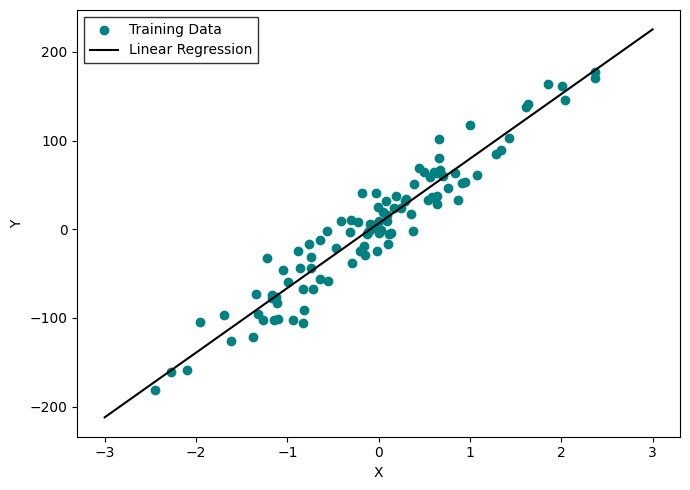

In [56]:
# Training data with some noise
x_train =  x +  np.random.uniform(-0.4, 0.2, size=len(x))
y_train =  y +  np.random.uniform(-0.2, 0.2, size=len(y))

# Test data
x_test = np.linspace(-3, 3, 50)

# Performing Linear Regression
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)
reg.predict(x_test)
bais =  reg.bias
weight = reg.weight
print(f"Bais: {bais}, Weight: {weight}")
reg.plot()